<a href="https://colab.research.google.com/github/asrorKholmatov/ML-Engineer-Portfolio/blob/main/UEFA_2025_players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UEFA 2025 Players – Exploratory Data Analysis (EDA)

## Introduction

This project presents an exploratory data analysis (EDA) of the UEFA 2025 players dataset. The aim is to analyze key player statistics such as age, goals, minutes played, distance covered, and top speed to uncover patterns, relationships, and trends.

The analysis will focus on answering the following questions:

- Do players who play more minutes cover more distance?
- Is there a connection between age and top speed?
- Do physical attributes affect goal scoring performance?

In [ ]:
!pip install opendatasets --quiet

In [ ]:
import pandas as pd
import numpy as np
import opendatasets as od
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', None)

In [ ]:
od.download('https://www.kaggle.com/datasets/pabloramoswilkins/ucl-2025-players-data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

In [ ]:
os.listdir('ucl-2025-players-data')

['teams_data.csv', 'DAY_4']

In [ ]:
team_df = pd.read_csv("/content/ucl-2025-players-data/teams_data.csv")
players_df = pd.read_csv("/content/ucl-2025-players-data/DAY_4/players_data.csv")
key_df = pd.read_csv('/content/ucl-2025-players-data/DAY_4/key_stats_data.csv')
goals_df = pd.read_csv('/content/ucl-2025-players-data/DAY_4/goals_data.csv')

In [ ]:
players_df

,id_player,player_name,nationality,field_position,position,weight(kg),height(cm),age,id_team,player_image
0,250016833,Harry Kane,England,Forward,STRIKER,65.0,188.0,31,50037,https://img.uefa.com/imgml/TP/players/1/2025/3...
1,250105927,Viktor Gyökeres,Sweden,Forward,NaN,NaN,NaN,26,50149,https://img.uefa.com/imgml/TP/players/1/2025/3...
2,250121533,Vinícius Júnior,Brazil,Forward,UNKNOWN,NaN,NaN,24,50051,https://img.uefa.com/imgml/TP/players/1/2025/3...
3,250121294,Tijjani Reijnders,Netherlands,Midfielder,CENTRAL_MIDFIELDER,NaN,NaN,26,50058,https://img.uefa.com/imgml/TP/players/1/2025/3...
4,250160436,Maghnes Akliouche,France,Midfielder,UNKNOWN,NaN,NaN,22,50023,https://img.uefa.com/imgml/TP/players/1/2025/3...
...,...,...,...,...,...,...,...,...,...,...
903,250011071,Scott Bain,Scotland,Goalkeeper,GOALKEEPER,NaN,NaN,32,50050,https://img.uefa.com/imgml/TP/players/1/2025/3...
904,250000104,Carlo Pinsoglio,Italy,Goalkeeper,UNKNOWN,NaN,NaN,34,50139,https://img.uefa.com/imgml/TP/players/1/2025/3...
905,108501,Wojciech Szczęsny,Poland,Goalkeeper,GOALKEEPER,84.0,196.0,34,50080,https://img.uefa.com/imgml/TP/players/1/2025/3...
906,103827,César Azpilicueta,Spain,Defender,FULL_BACK,75.0,178.0,35,50124,https://img.uefa.com/imgml/TP/players/1/2025/3...


In [ ]:
team_df.head()

,team_id,country,team,logo
0,50138,Italy,FC Internazionale Milano,https://img.uefa.com/imgml/TP/teams/logos/70x7...
1,50124,Spain,Atlético de Madrid,https://img.uefa.com/imgml/TP/teams/logos/70x7...
2,50111,Austria,SK Sturm Graz,https://img.uefa.com/imgml/TP/teams/logos/70x7...
3,52816,Italy,Atalanta BC,https://img.uefa.com/imgml/TP/teams/logos/70x7...
4,50050,Scotland,Celtic FC,https://img.uefa.com/imgml/TP/teams/logos/70x7...


In [ ]:
players_teams = pd.merge(players_df, team_df, how='left', left_on='id_team', right_on='team_id')
full_df = pd.merge(players_teams, goals_df, how='left', on='id_player')
full_df = pd.merge(full_df, key_df, how='left', on='id_player')

We merged player, team, goal, and key stats data to create a complete player dataset (full_df) for further analysis.

In [ ]:
full_df.columns

Index(['id_player', 'player_name', 'nationality', 'field_position', 'position',
       'weight(kg)', 'height(cm)', 'age', 'id_team', 'player_image', 'team_id',
       'country', 'team', 'logo', 'goals', 'inside_area', 'outside_area',
       'right_foot', 'left_foot', 'head', 'other', 'penalties_scored',
       'distance_covered(km/h)', 'top_speed', 'minutes_played',
       'matches_appareance'],
      dtype='object')

We will check for missing values in the dataset.

In [ ]:
full_df.isna().sum().sort_values(ascending=False).head(10)

,0
weight(kg),754
height(cm),729
position,207
head,181
other,181
penalties_scored,181
goals,181
inside_area,181
outside_area,181
right_foot,181


Dropping irrelevant or unused columns to simplify the dataset.

In [ ]:
full_df = full_df.drop(columns=['player_image', 'logo', 'team_id', 'position', 'weight(kg)', 'height(cm)'])

In [ ]:
full_df.head()

,id_player,player_name,nationality,field_position,age,id_team,country,team,goals,inside_area,outside_area,right_foot,left_foot,head,other,penalties_scored,distance_covered(km/h),top_speed,minutes_played,matches_appareance
0,250016833,Harry Kane,England,Forward,31,50037,Germany,FC Bayern München,5.0,5.0,0.0,5.0,0.0,0.0,0.0,3.0,43.71,30.35,360.0,4.0
1,250105927,Viktor Gyökeres,Sweden,Forward,26,50149,Portugal,Sporting Clube de Portugal,5.0,5.0,0.0,5.0,0.0,0.0,0.0,2.0,41.94,34.55,360.0,4.0
2,250121533,Vinícius Júnior,Brazil,Forward,24,50051,Spain,Real Madrid C.F.,4.0,3.0,1.0,2.0,2.0,0.0,0.0,1.0,38.39,35.47,360.0,4.0
3,250121294,Tijjani Reijnders,Netherlands,Midfielder,26,50058,Italy,AC Milan,3.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,46.61,32.26,360.0,4.0
4,250160436,Maghnes Akliouche,France,Midfielder,22,50023,France,AS Monaco,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,44.67,33.39,360.0,4.0


We move all columns starting with "id" to the beginning of the DataFrame.

In [ ]:
id_cols = [col for col in full_df.columns if col.startswith('id')]
new_order = id_cols + [col for col in full_df.columns if col not in id_cols]
df = full_df[new_order]

Missing values are filled to prepare the data for analysis.

In [ ]:
from sklearn.impute import SimpleImputer

missing_cols = ['goals', 'inside_area', 'outside_area', 'right_foot', 'minutes_played', 'matches_appareance', 'penalties_scored', 'other', 'head', 'left_foot']

imputer = SimpleImputer(strategy='median')
df[missing_cols] = imputer.fit_transform(df[missing_cols])
df['top_speed'] = df['top_speed'].fillna(df['top_speed'].mean().round(2))
df['distance_covered(km/h)'] = df.groupby('field_position')['distance_covered(km/h)'].transform(lambda x: x.fillna(x.median()))

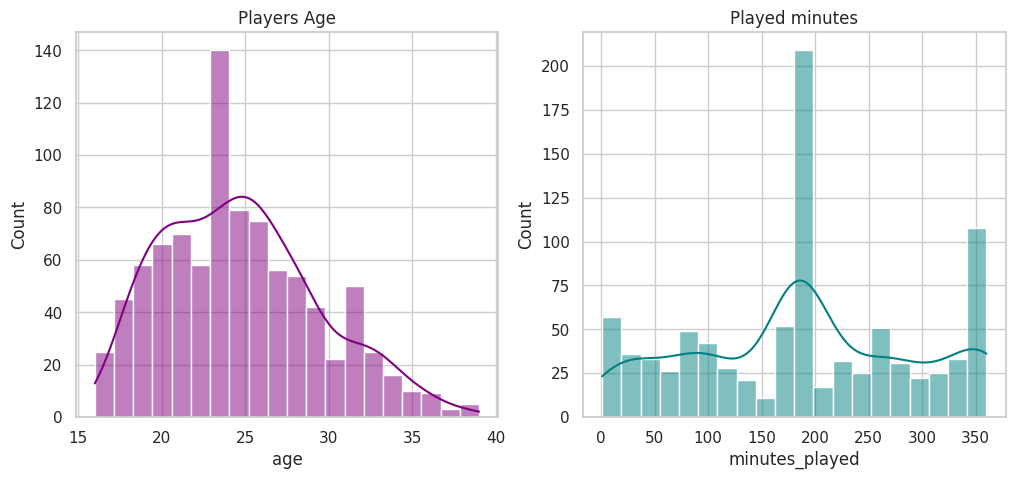

In [ ]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121)
sns.histplot(df['age'], bins=20, kde=True, color='purple', ax=ax)
ax.set_title("Players Age")

ax = fig.add_subplot(122)
sns.histplot(df['minutes_played'], bins=20, kde=True, color='teal', ax=ax)
ax.set_title("Played minutes")

plt.show()

This plot shows the distribution of players by age and minutes played.
We can see that 25-year-old players are the most common, and many players have played around 200 minutes.

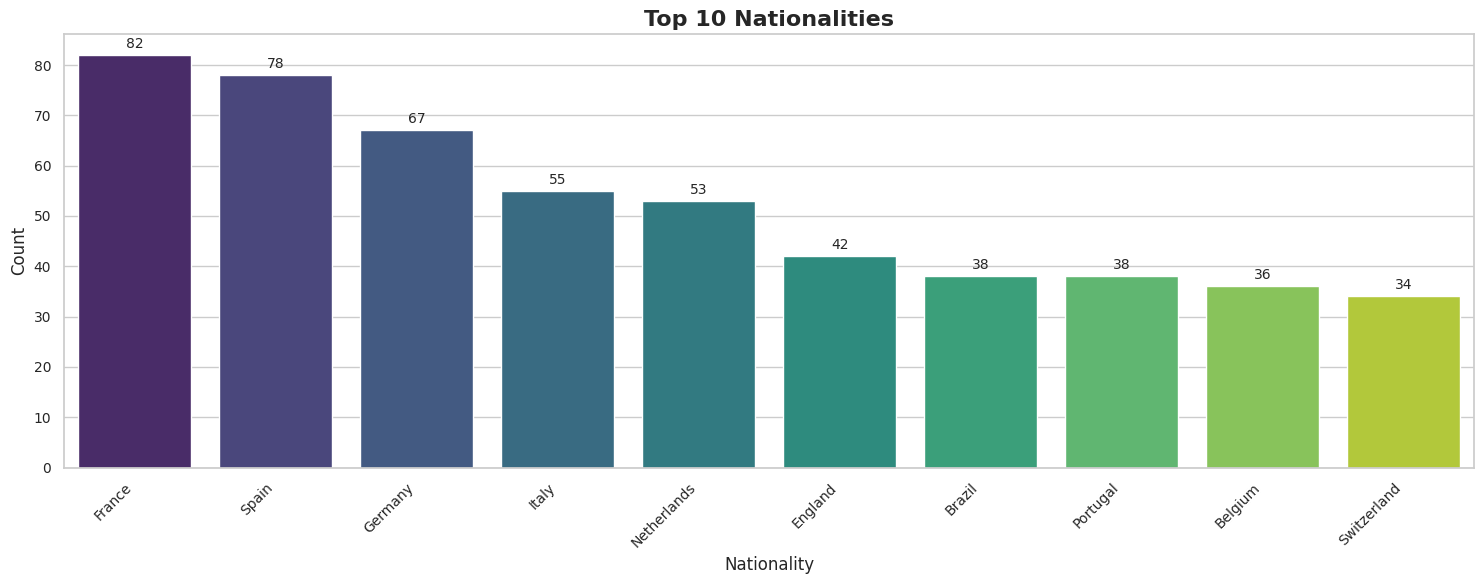

In [ ]:
sns.set(style="whitegrid", palette="mako")


plt.figure(figsize=(15, 6))
ax = sns.countplot(
    data=df,
    x='nationality',
    order=df['nationality'].value_counts().index[:10],
    palette='viridis'
)


for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=3)


plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Top 10 Nationalities", fontsize=16, fontweight='bold')
plt.xlabel("Nationality", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

This chart shows the most represented nationalities in the Champions League.
As expected, France has the highest number of players. Interestingly, Brazil ranks only 7th, which was unexpected.

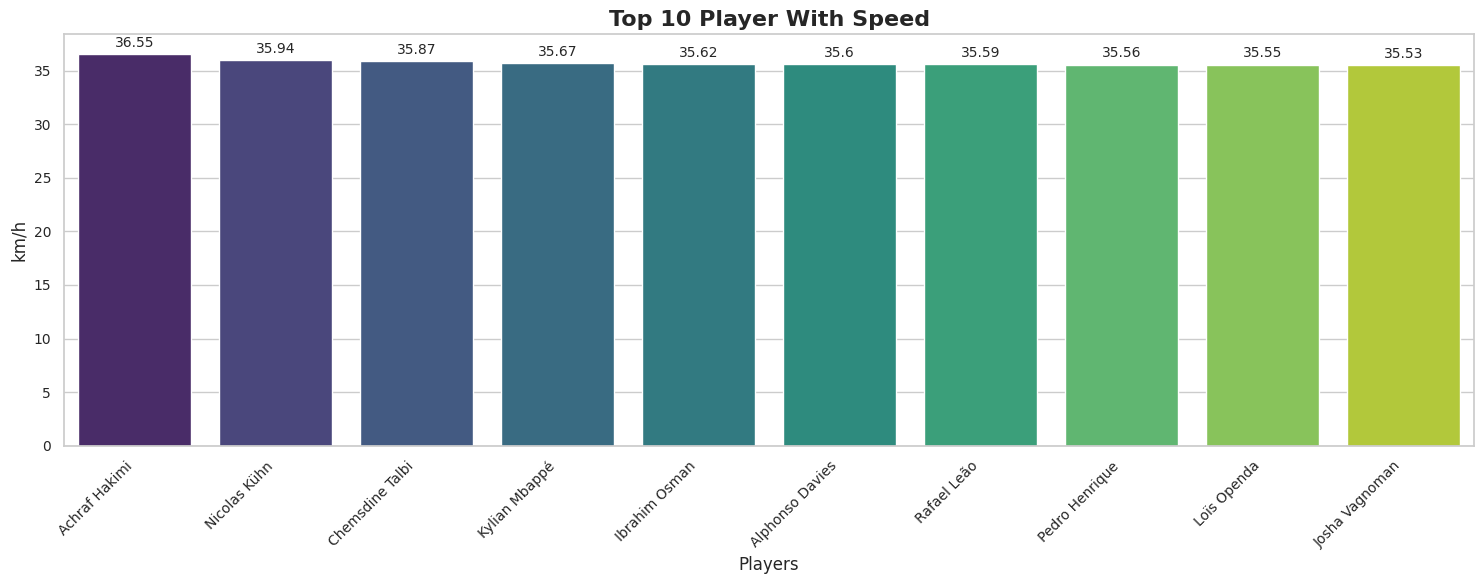

In [ ]:
top_speed = df.sort_values(by='top_speed', ascending=False).head(10)

plt.figure(figsize=(15, 6))
ax = sns.barplot(
    data=top_speed,
    x='player_name',
    y='top_speed',
    palette='viridis'
)


for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=3)


plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Top 10 Player With Speed", fontsize=16, fontweight='bold')
plt.xlabel("Players", fontsize=12)
plt.ylabel("km/h", fontsize=12)

plt.tight_layout()
plt.show()

This chart displays the top 10 fastest players based on top speed.
Achraf Hakimi ranks first with a speed of 36.55 km/h. However, the rest of the players have very similar top speeds, with only slight differences between them.

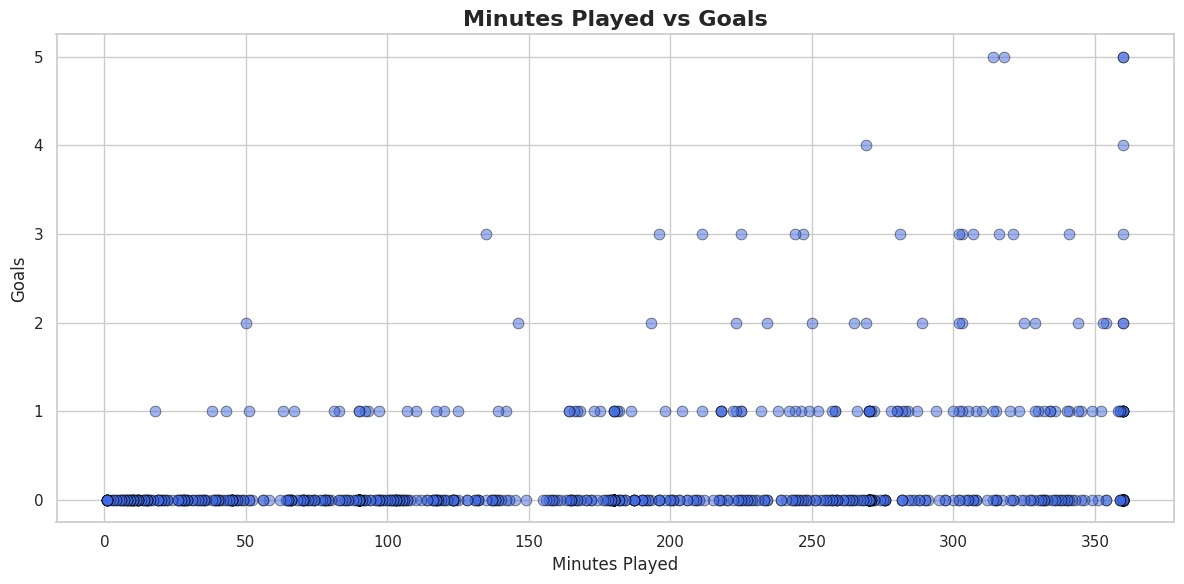

In [ ]:
plt.figure(figsize=(12, 6))


sns.scatterplot(
    data=df,
    x='minutes_played',
    y='goals',
    alpha=0.5,
    s=60,
    color='royalblue',
    edgecolor='black'
)


plt.title('Minutes Played vs Goals', fontsize=16, fontweight='bold')
plt.xlabel('Minutes Played', fontsize=12)
plt.ylabel('Goals', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

There appears to be a positive relationship between minutes played and goals scored.
As players spend more time on the pitch, their chances of scoring increase — which is logically expected.

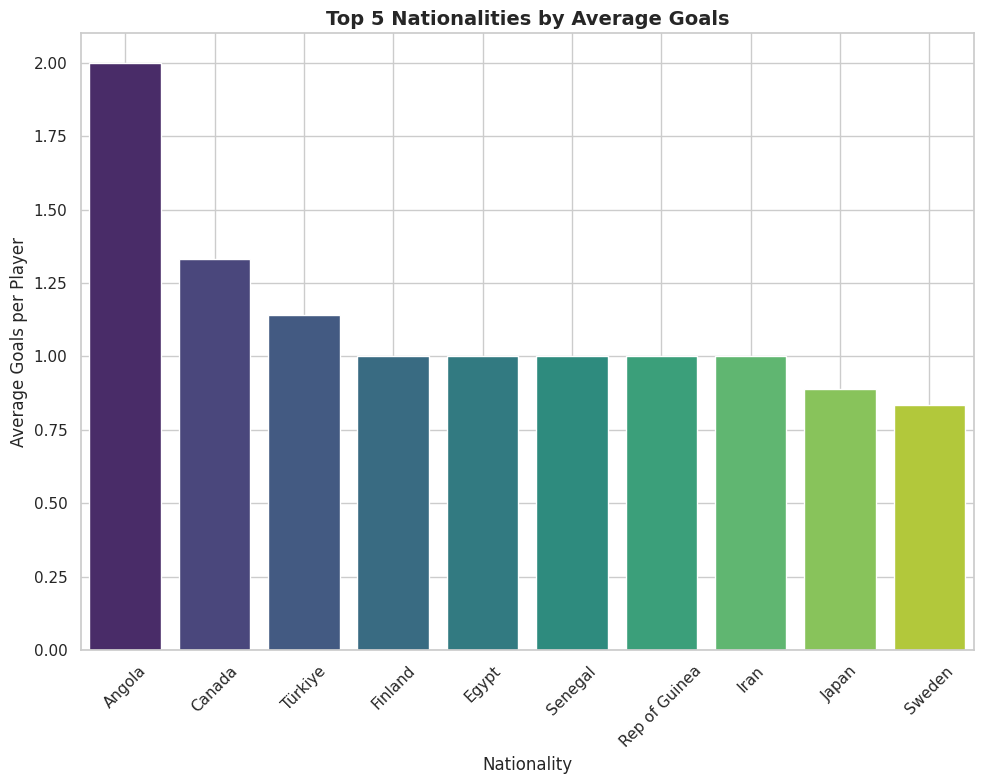

In [ ]:
national_goals = df.groupby('nationality')['goals'].mean().sort_values(ascending=False)


plt.figure(figsize=(10, 8))
top5 = national_goals.head(10)
sns.barplot(x=top5.index, y=top5.values, palette='viridis')


plt.title("Top 5 Nationalities by Average Goals", fontsize=14, fontweight='bold')
plt.xlabel("Nationality", fontsize=12)
plt.ylabel("Average Goals per Player", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

This chart shows the top 10 nationalities based on average goals scored per player.
Surprisingly, Angola ranks first, despite not being among the countries with the most players.
On the other hand, France — which has the largest number of players — does not appear in the top 10.
I initially expected France to be at the top, so this result was unexpected and quite interesting.

In [ ]:
position_goals = df.groupby('field_position')['goals'].mean().sort_values(ascending=False)

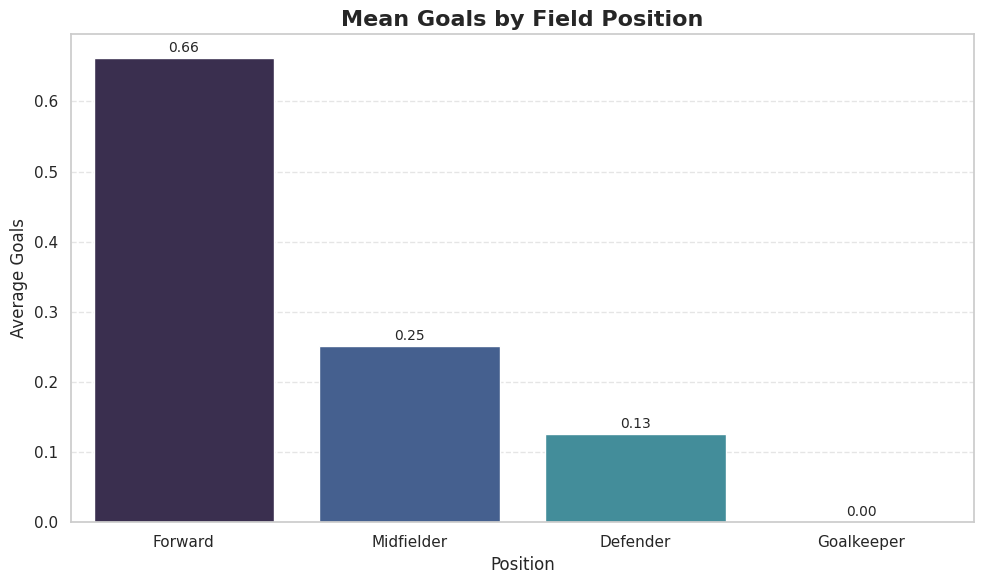

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=position_goals.index, y=position_goals.values, palette='mako')

for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=2, fmt='%.2f')

plt.title("Mean Goals by Field Position", fontsize=16, fontweight='bold')
plt.xlabel("Position", fontsize=12)
plt.ylabel("Average Goals", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This chart displays the average number of goals scored by players in each position.
As expected, forwards have the highest goal average, followed by midfielders and defenders.
Goalkeepers rank last, which makes sense as they rarely score goals in a match.

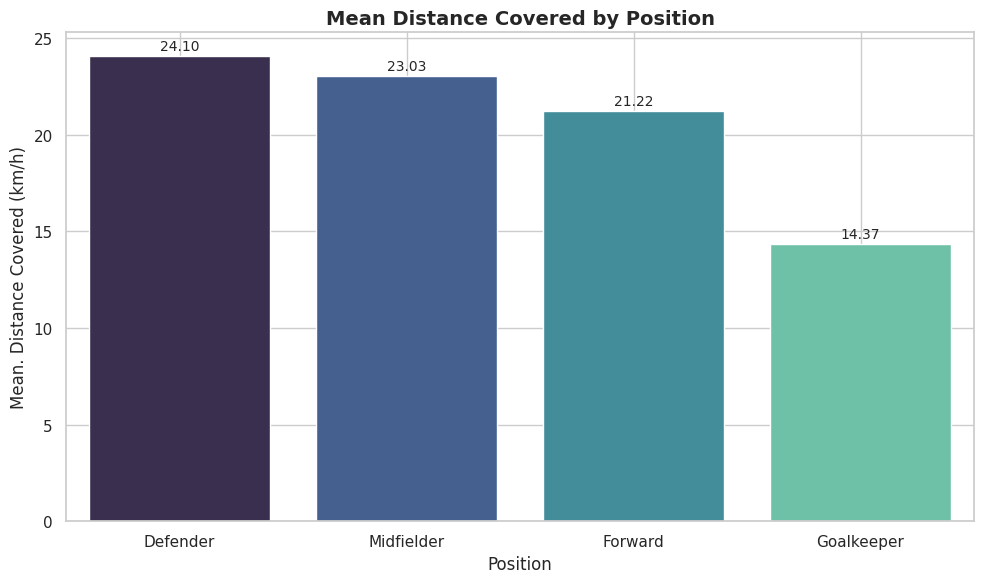

In [ ]:
position_distance = df.groupby('field_position')['distance_covered(km/h)'].mean().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
ax = sns.barplot(x=position_distance.index, y=position_distance.values, palette='mako')

for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=2, fmt='%.2f')

plt.title("Mean Distance Covered by Position", fontsize=14, fontweight='bold')
plt.xlabel("Position", fontsize=12)
plt.ylabel("Mean. Distance Covered (km/h)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Defenders surprisingly top the list with the highest mean distance (24.10 km/h), even ahead of midfielders (23.03 km/h). Forwards follow with 21.22 km/h. As expected, goalkeepers cover the least (14.37 km/h). The data reflects each role’s movement demand on the field.



In [ ]:
print("The average player have {:.4f} goals, 99% of players have {} goals or less, while the most goals ever recored is {}. "
.format(df['goals'].mean(), df['goals'].quantile(0.99), df['goals'].max()))

The average player have 0.2834 goals, 99% of players have 3.0 goals or less, while the most goals ever recored is 5.0. 


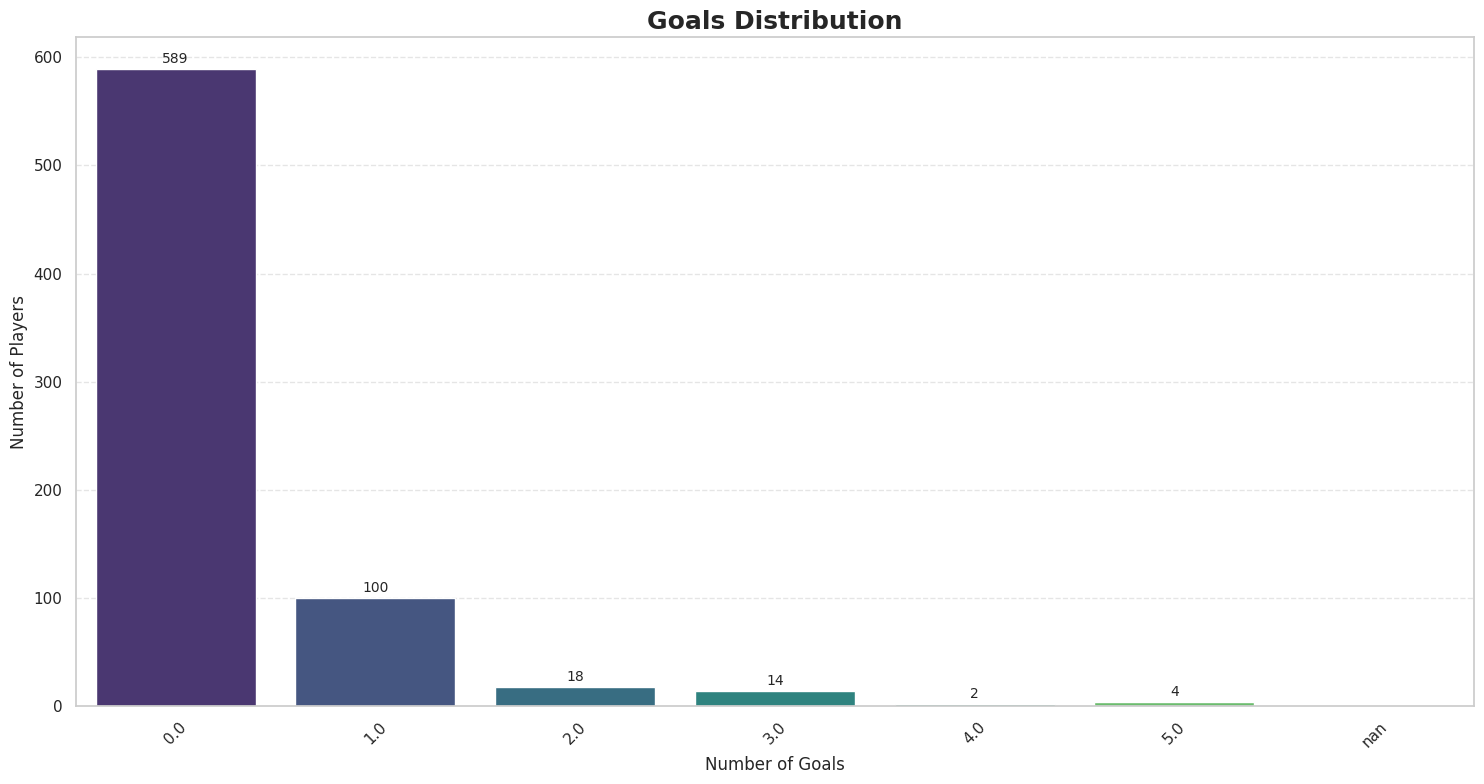

In [ ]:
data = df.copy()

plt.figure(figsize=(15, 8))
ax = sns.countplot(
    data=data,
    x='goals',
    order=sorted(data['goals'].unique()),
    palette='viridis'
)

for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=2)

plt.title("Goals Distribution", fontsize=18, weight='bold')
plt.xlabel("Number of Goals", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The majority of players (589) didn’t score any goals, showing a heavy skew toward zero. Only a few players scored 1 goal (100), and even fewer managed 2 or more. Goal-scoring is clearly concentrated among a small group of players.

In [ ]:
mean_distance = round(df['distance_covered(km/h)'].mean(), 2)
percentile_99 = round(df['distance_covered(km/h)'].quantile(0.99), 2)
max_distance = df['distance_covered(km/h)'].max()

print(f"The average player walks for {mean_distance}km 99% of players walks {percentile_99}m or less, while the most walks ever recored is {max_distance}. ")

The average player walks for 22.38km 99% of players walks 47.04m or less, while the most walks ever recored is 50.46. 


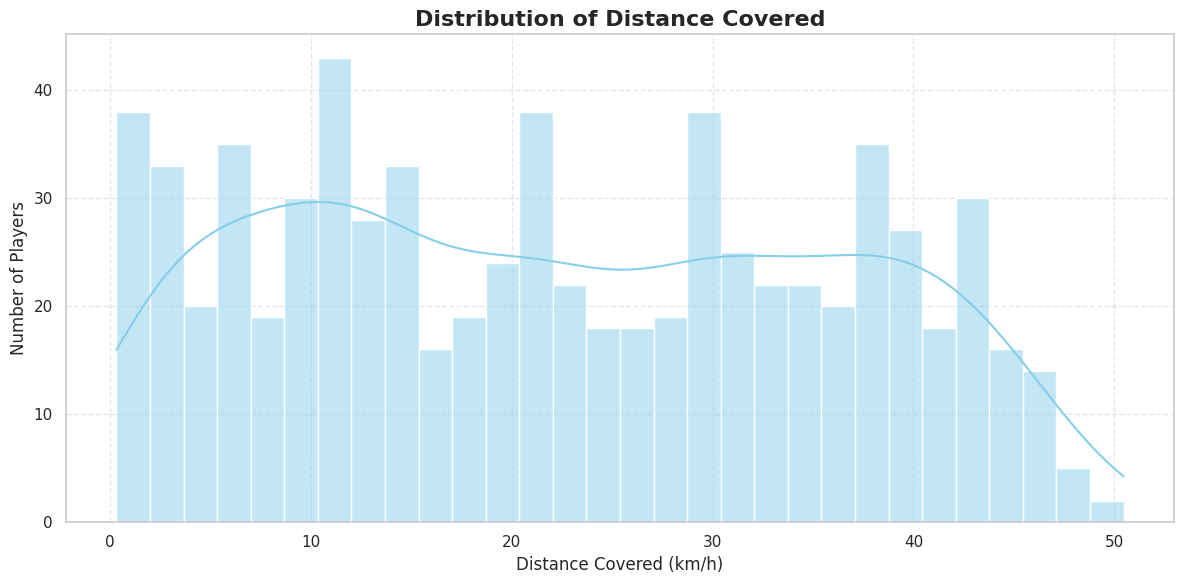

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['distance_covered(km/h)'], kde=True, bins=30, color='skyblue')

plt.title("Distribution of Distance Covered", fontsize=16, weight='bold')
plt.xlabel("Distance Covered (km/h)", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The distance covered by players is widely spread, with peaks around 10 km/h and again near 30–40 km/h. The distribution suggests a mix of low-activity and high-activity players, possibly reflecting diverse roles and playing styles.



In [ ]:
older_player = df.sort_values(by='age', ascending=False).head(10)
younger_player = df.sort_values(by='age', ascending=True).head(10)

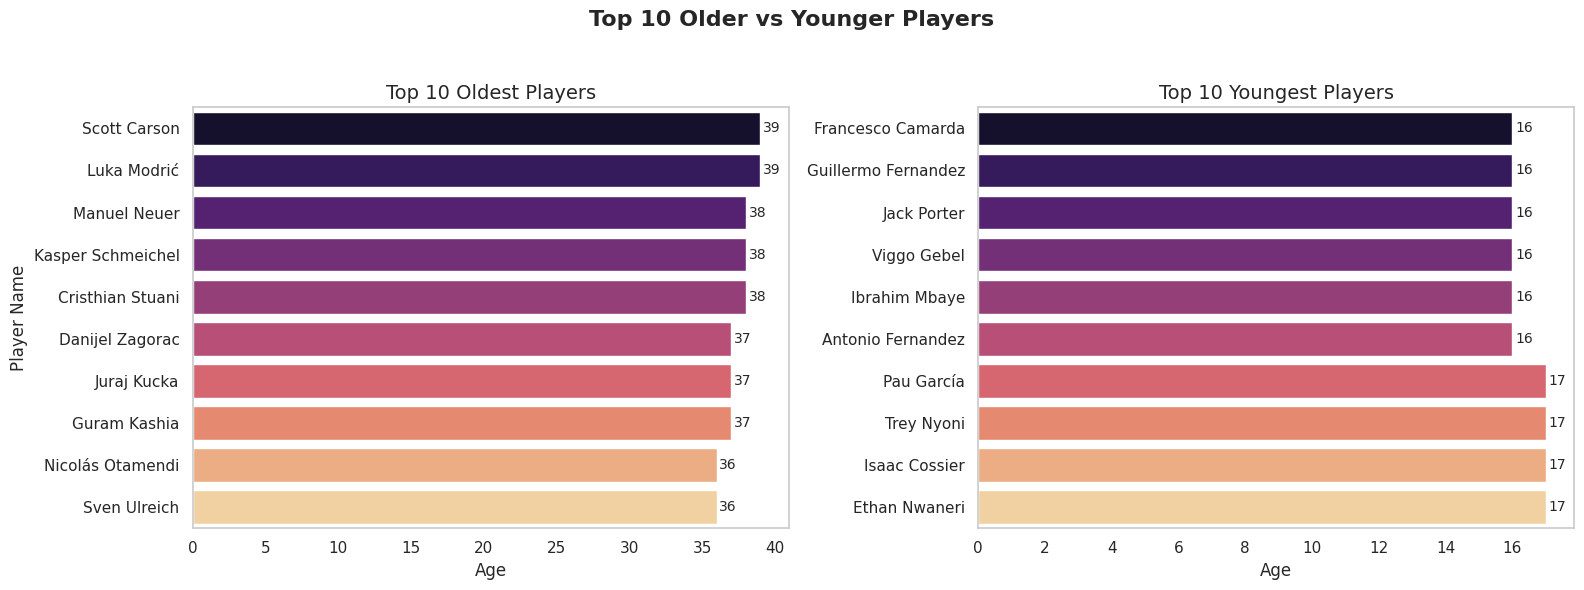

In [ ]:
fig = plt.figure(figsize=(16, 6))
fig.suptitle("Top 10 Older vs Younger Players", fontsize=16, fontweight='bold')


ax1 = fig.add_subplot(121)
sns.barplot(data=older_player, x='age', y='player_name', palette='magma', ax=ax1)
ax1.set_title("Top 10 Oldest Players", fontsize=14)
ax1.set_xlabel("Age")
ax1.set_ylabel("Player Name")
ax1.grid(axis='x')

for container in ax1.containers:
    ax1.bar_label(container, fontsize=10, padding=2)


ax2 = fig.add_subplot(122)
sns.barplot(data=younger_player, x='age', y='player_name', palette='magma', ax=ax2)
ax2.set_title("Top 10 Youngest Players", fontsize=14)
ax2.set_xlabel("Age")
ax2.set_ylabel("")
ax2.grid(axis='x')

for container in ax2.containers:
    ax2.bar_label(container, fontsize=10, padding=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

This chart shows the top 10 youngest and oldest players in the dataset.
Francesco Camarda is the youngest player at just 16 years old, while Scott Carson is the oldest at 39.
Interestingly, there are six players who are only 16 years old, which highlights the presence of very young talent in the tournament.

In [ ]:
young_goal = df[df['goals'] > 0].sort_values(by='age', ascending=True).head(5)

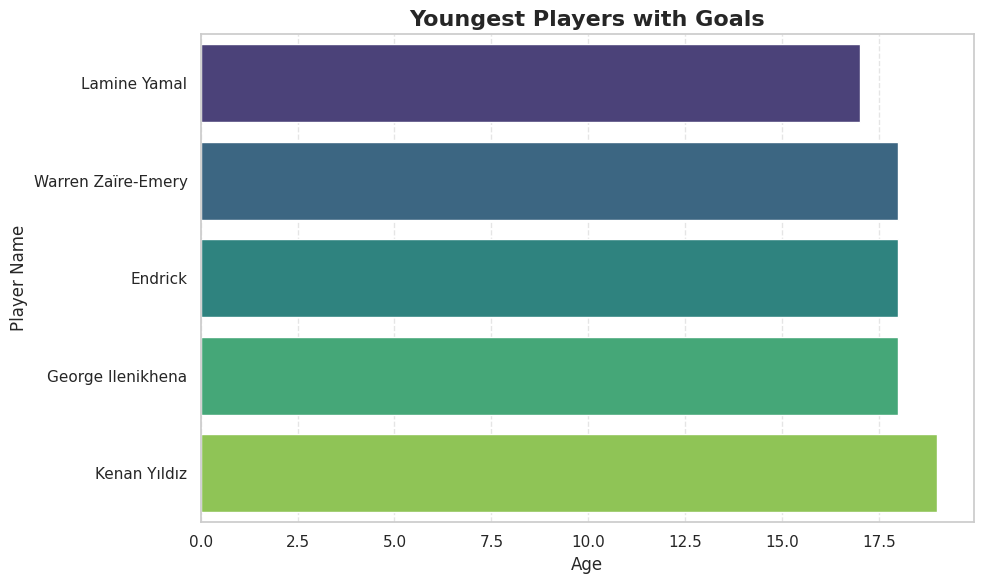

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=young_goal,
    x='age',
    y='player_name',
    palette='viridis'
)

plt.title("Youngest Players with Goals", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Player Name", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This table shows the youngest players who have scored at least one goal.
Lamine Yamal ranks first as the youngest goal scorer — an impressive achievement for such a young talent.

In [ ]:
numeric_cols = ['age', 'goals', 'minutes_played', 'distance_covered(km/h)', 'top_speed']
corr = df[numeric_cols].corr()

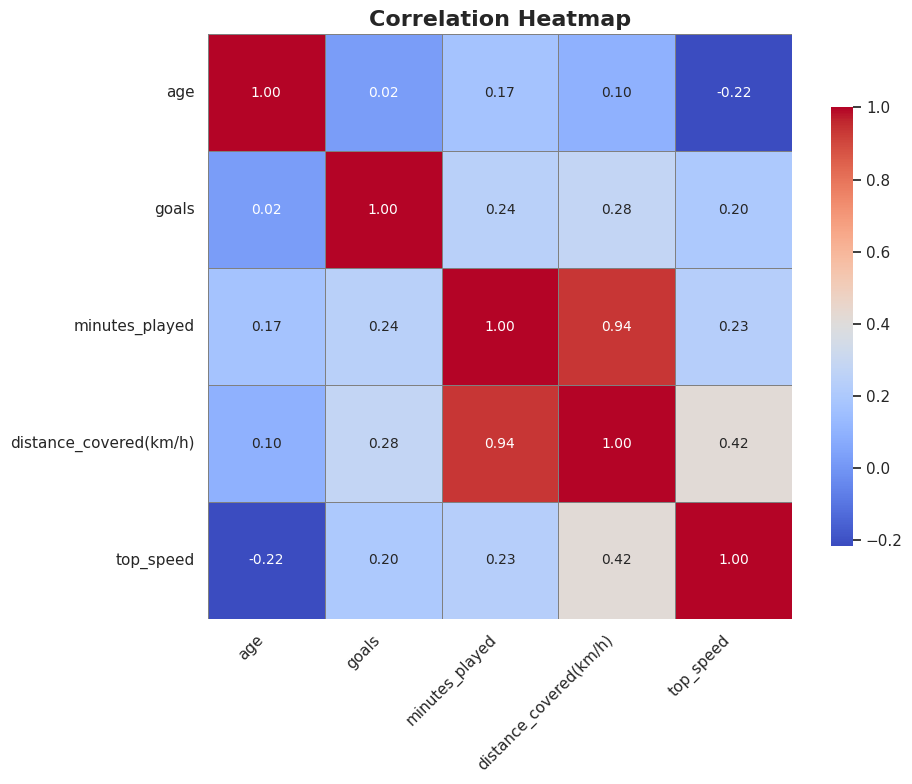

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    square=True,
    linewidths=0.5,
    linecolor='grey',
    cbar_kws={"shrink": 0.75},
    annot_kws={"size":10}
)

plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

There is a strong positive correlation between minutes_played and distance_covered (km/h) (0.94), meaning the more a player plays, the more distance they cover.

Top_speed is moderately correlated with distance_covered (0.42), suggesting faster players tend to run more.

Age has a slight negative correlation with top_speed (-0.22), indicating older players may be slower.

Goals have weak correlations with all variables, showing that scoring is less dependent on physical stats like speed or distance.

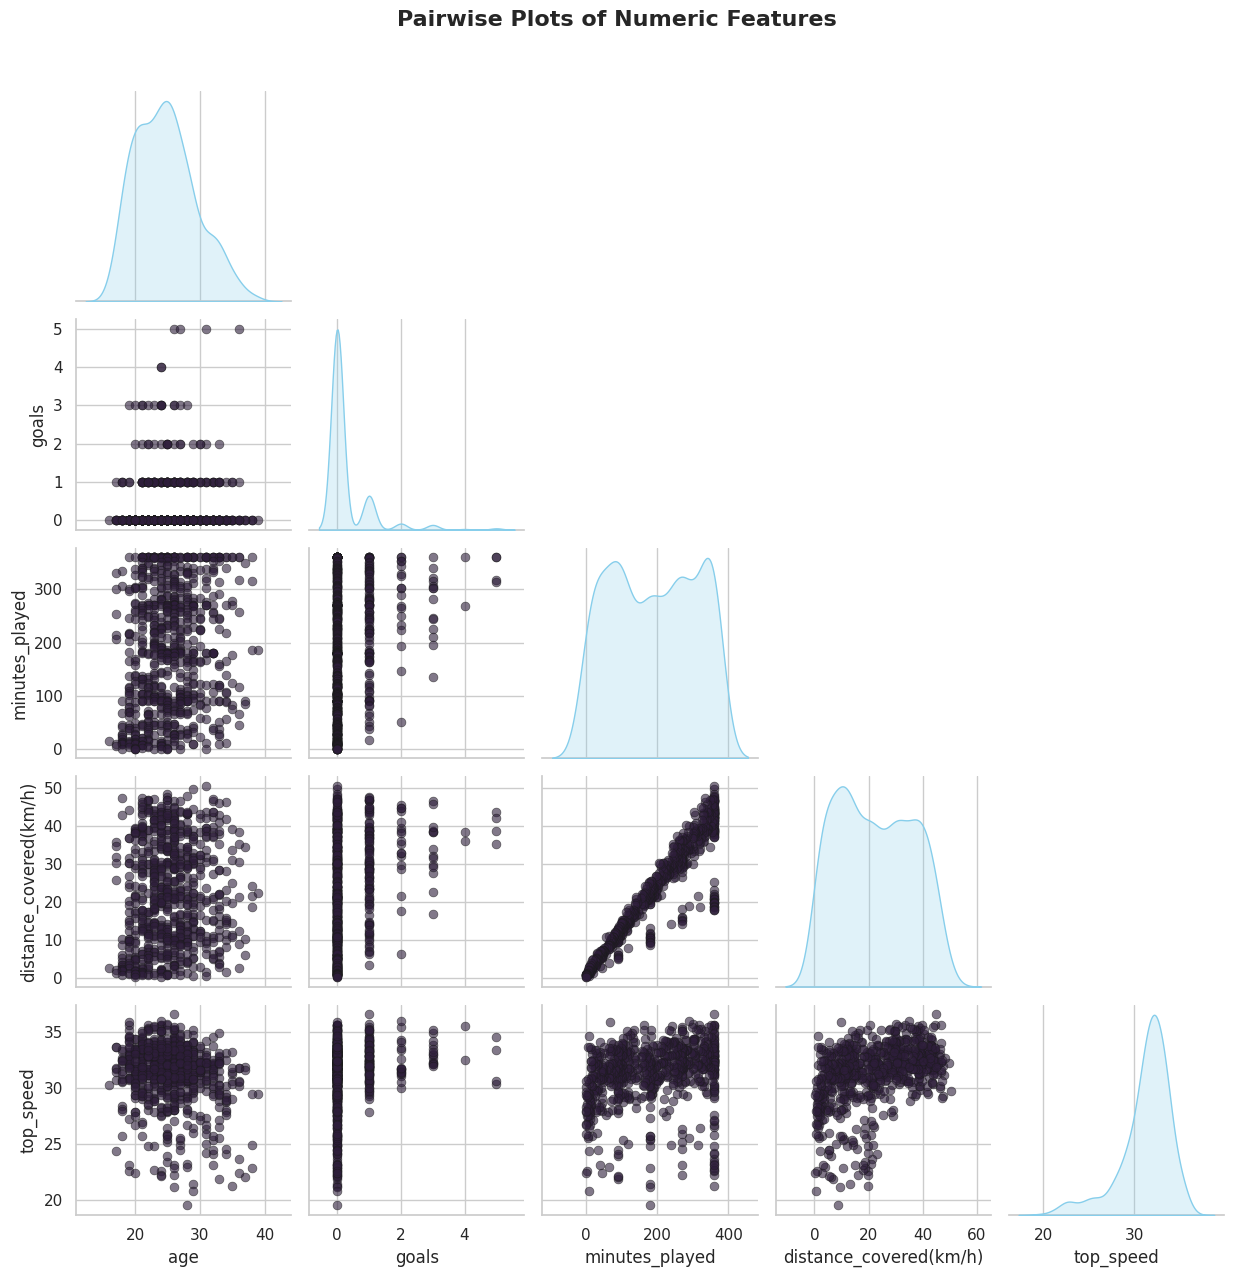

In [ ]:
sns.pairplot(
    df[numeric_cols],
    corner=True,
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's':40, 'edgecolor':'k'},
    diag_kws={'shade': True, 'color':'skyblue'}
)

plt.suptitle("Pairwise Plots of Numeric Features", fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
longtime_player = df.sort_values(by='minutes_played', ascending=False).head(10)

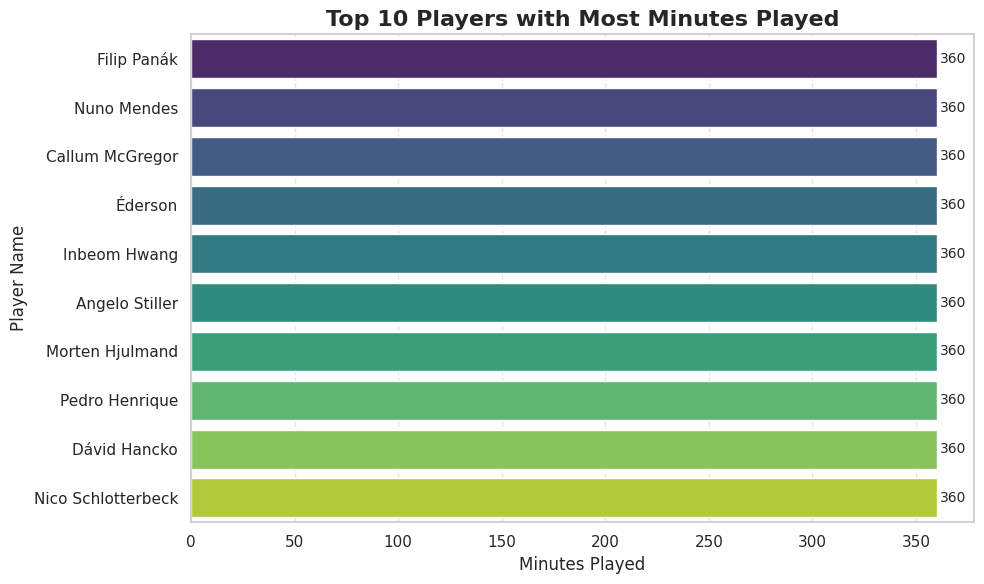

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=longtime_player,
    x='minutes_played',
    y='player_name',
    palette='viridis'
)
for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=2)

plt.title("Top 10 Players with Most Minutes Played", fontsize=16, fontweight='bold')
plt.xlabel("Minutes Played", fontsize=12)
plt.ylabel("Player Name", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The top players with the most minutes played have all recorded exactly 360 minutes.
This suggests they have played every minute of all matches so far — likely indicating they are goalkeepers, as they are rarely substituted.



## Conclusion

Based on the correlation heatmap and other visualizations:

- There is a strong positive correlation between `minutes_played` and `distance_covered`, meaning the more a player plays, the more distance they tend to cover.
- `Top_speed` is moderately correlated with `distance_covered`, suggesting that faster players generally cover more ground.
- There is a slight negative correlation between `age` and `top_speed`, indicating that older players may have lower sprinting capabilities.
- `Goals` do not show strong correlation with any physical variables, which means scoring is likely influenced by other factors such as positioning, skills, or tactics.

Overall, this EDA provides useful insights into player performance metrics and how they relate to each other.